In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster as sc

In [32]:
# Load the dataset
DATASET_PATH = 'dataset/Wahl-O-Mat Bundestagswahl 2025_Datensatz_v1.02.csv'
dataset = pd.read_csv(DATASET_PATH, header=0)

In [33]:
dataset

,Partei: Nr.,Partei: Kurzbezeichnung,Partei: Name,These: Nr.,These: Titel,These: These,Position: Position,Position: Begründung
0,1,SPD,Sozialdemokratische Partei Deutschlands,1,Unterstützung der Ukraine,Deutschland soll die Ukraine weiterhin militär...,stimme zu,"Die SPD bekennt sich klar zur diplomatischen, ..."
1,2,CDU / CSU,Christlich Demokratische Union Deutschlands / ...,1,Unterstützung der Ukraine,Deutschland soll die Ukraine weiterhin militär...,stimme zu,Unser Ziel ist Frieden in Europa. Die Ukraine ...
2,3,GRÜNE,BÜNDNIS 90/DIE GRÜNEN,1,Unterstützung der Ukraine,Deutschland soll die Ukraine weiterhin militär...,stimme zu,Millionen Ukrainer*innen verteidigen Tag für T...
3,4,FDP,Freie Demokratische Partei,1,Unterstützung der Ukraine,Deutschland soll die Ukraine weiterhin militär...,stimme zu,Unsere Unterstützung für die Ukraine darf nich...
4,5,AfD,Alternative für Deutschland,1,Unterstützung der Ukraine,Deutschland soll die Ukraine weiterhin militär...,stimme nicht zu,Wir fordern von allen Kriegsparteien eine Eins...
...,...,...,...,...,...,...,...,...
1059,24,BüSo,Bürgerrechtsbewegung Solidarität,38,Erhöhung des Mindestlohns,Der gesetzliche Mindestlohn soll spätestens 20...,stimme zu,Jeder sollte von seiner Arbeit leben können. F...
1060,25,BÜNDNIS DEUTSCHLAND,BÜNDNIS DEUTSCHLAND,38,Erhöhung des Mindestlohns,Der gesetzliche Mindestlohn soll spätestens 20...,stimme nicht zu,Die Mindestlohnregelungen stellen einen gravie...
1061,26,BSW,Bündnis Sahra Wagenknecht – Vernunft und Gerec...,38,Erhöhung des Mindestlohns,Der gesetzliche Mindestlohn soll spätestens 20...,stimme zu,NaN
1062,27,MERA25,MERA25 - Gemeinsam für Europäische Unabhängigkeit,38,Erhöhung des Mindestlohns,Der gesetzliche Mindestlohn soll spätestens 20...,stimme zu,Wir setzen uns ein für einen bundesweiten effe...


In [34]:
position_categories = list(dataset["Position: Position"].unique())
dataset["position_numerical"] = dataset["Position: Position"].apply(lambda x: position_categories.index(x))
dataset = dataset[["Partei: Kurzbezeichnung", "position_numerical", "These: Titel"]]
dataset

,Partei: Kurzbezeichnung,position_numerical,These: Titel
0,SPD,0,Unterstützung der Ukraine
1,CDU / CSU,0,Unterstützung der Ukraine
2,GRÜNE,0,Unterstützung der Ukraine
3,FDP,0,Unterstützung der Ukraine
4,AfD,1,Unterstützung der Ukraine
...,...,...,...
1059,BüSo,0,Erhöhung des Mindestlohns
1060,BÜNDNIS DEUTSCHLAND,1,Erhöhung des Mindestlohns
1061,BSW,0,Erhöhung des Mindestlohns
1062,MERA25,0,Erhöhung des Mindestlohns


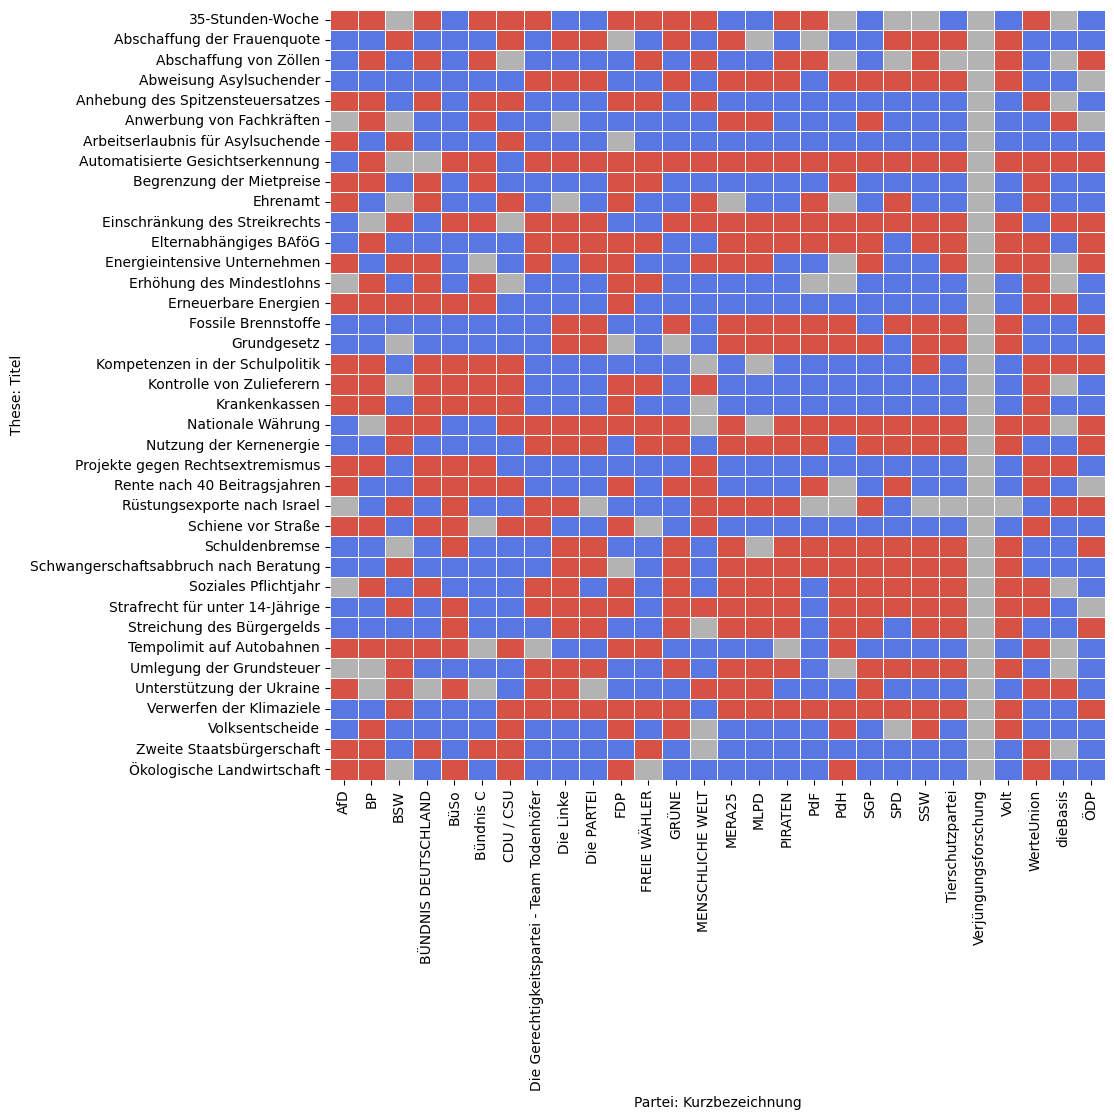

In [35]:
pivot = dataset.pivot(index="These: Titel" , columns="Partei: Kurzbezeichnung", values="position_numerical")
original_cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a new colormap where red maps to gray instead of blue
custom_cmap = [
    original_cmap(0.1),   # Light Blue
    original_cmap(0.9),  # Light Red
    (0.7, 0.7, 0.7),     # Neutral Gray
    ]  

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(pivot, cmap=custom_cmap, cbar=False, ax=ax, linewidths=0.5,)
plt.show()

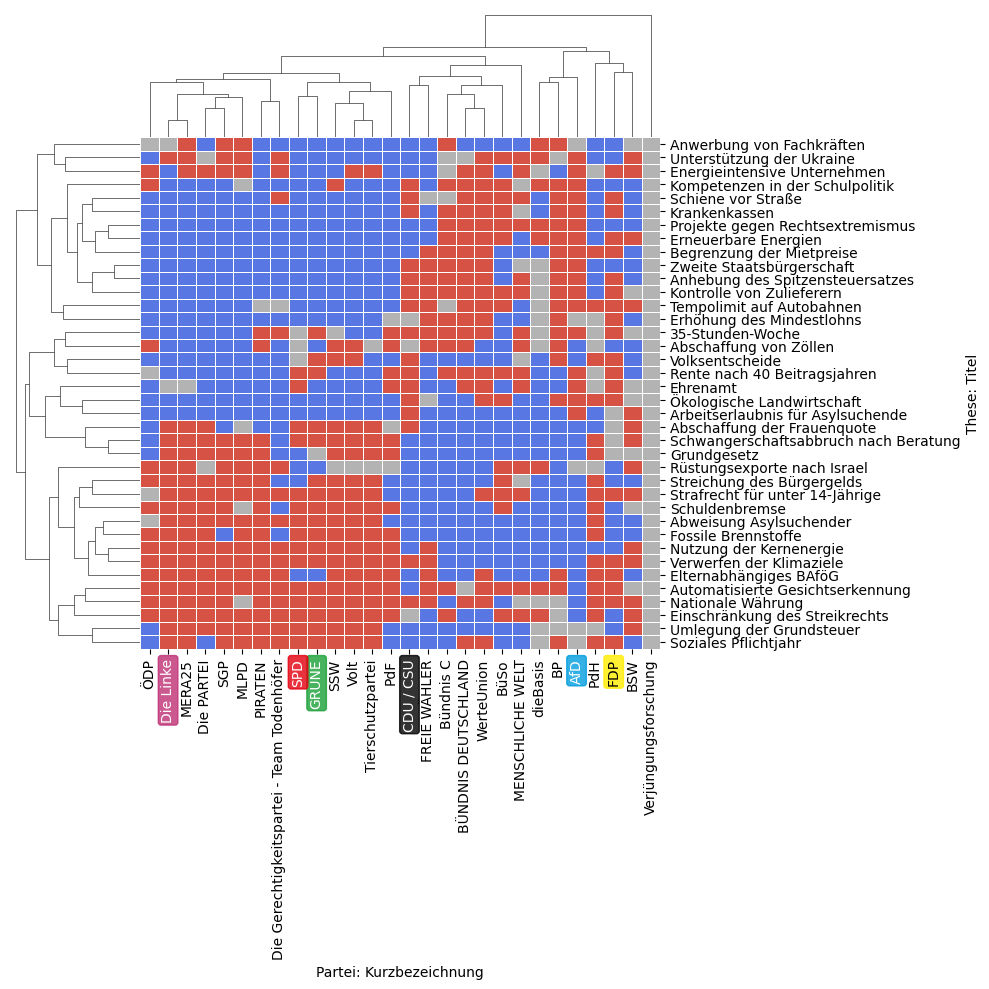

In [78]:
LINKAGE_METHOD = "complete"
row_linkage = sc.hierarchy.linkage(pivot, method=LINKAGE_METHOD, optimal_ordering=True)
col_linkage = sc.hierarchy.linkage(pivot.T, method=LINKAGE_METHOD, optimal_ordering=True)


SIZE = (10, 10)
grid = sns.clustermap(
    pivot,
    cmap=custom_cmap,
    cbar_pos=None,
    linewidths=0.5,
    row_linkage=row_linkage,
    col_linkage=col_linkage,
    figsize=SIZE,
)

party_colors = {
    "SPD": "#E3000F",        # Red
    "CDU / CSU": "#000000",  # Black
    "GRÜNE": "#1AA037",      # Green
    "FDP": "#FFED00",        # Yellow
    "AfD": "#009CDE",        # Blue
    "Die Linke": "#BE3075"   # Dark Red
}

def get_text_color(bg_color):
    if bg_color in ["#000000", "#E3000F", "#BE3075", "#1AA037", "#009CDE"]:  
        return "white"  
    return "black"  

for label in grid.ax_heatmap.get_xticklabels():
    party = label.get_text()
    
    if party in party_colors:
        bg_color = party_colors[party]
        text_color = get_text_color(bg_color)
        
        label.set_bbox(dict(facecolor=bg_color, edgecolor=bg_color, boxstyle="round,pad=0.2", alpha=0.8))
        label.set_color(text_color) 
        label.set_ha("center")  
        label.set_fontsize(10)

# Mirror (flip) the plot horizontally by inverting the x-axis:
grid.ax_heatmap.invert_xaxis()
grid.ax_col_dendrogram.invert_xaxis()
plt.savefig("clustermap.png", dpi=800)

plt.show()